**출처 : 딥러닝을 이용한 자연어 처리 입문(유원준,안상준), 잡아라!텍스트마이닝 with 파이썬(서대호)**

## 자연어란?

우리가 일상생활에서 사용하는 언어

## 자연어 처리란?

이러한 자연어의 의미를 분서갛여 컴퓨터가 처리할 수 있도록 하는 일이며,\
음성 인식, 내용 요약, 번역, 사용자의 감성 분석, 텍스트 분류 작업(스팸 메일 분류, 뉴스 기사 카테고리 분류), 질의 응답 시스템, 챗봇과 같은 곳에서 사용되는 분야입니다.

## 자연어 처리 과정

데이터 수집 > 전처리 및 정제 > 모델링 및 훈련 > 데이터분석 > 평가

### 사전처리(전처리)

해결하고자 하는 용도에 맞게 텍스트를 사전에 처리하는 작업\
텍스트에 제대로 전처리를 하지 않으면 자연어 처리 기법들이 제대로 동작하지 않을 수 있습니다.

### 정제와 정규화

- 정제(cleaning) : 갖고 있는 코퍼스로부터 노이즈 데이터를 제거
- 정규화(normalization) : 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어준다.

정제 작업은 토큰화 작업보다 앞서 이루어지기도 하지만, 토큰화 작업 이후에도 여전히 남아있는 노이즈들을 제거하기위해 지속적으로 이루어지기도 합니다.  
사실 완벽한 정제 작업은 어려운 편이라서, 대부분의 경우 이 정도면 됐다.라는 일종의 합의점을 찾기도 합니다.

1. 규칙에 기반한 표기가 다른 단어들의 통합
2. 대, 소문자 통합
3. 불필요한 단어의 제거
*   등장빈도가 적은 단어
*   길이가 짧은 단어

In [ ]:
import re

rowdata = "I was wondering if anyone out there could enlighten me on this car."

# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제 설정
shortword = re.compile(r'\W*\b\w{1,2}\b')

# 길이가 짧은 단어 삭제
data = shortword.sub('', rowdata)

# 결과 출력
print(data)

 was wondering anyone out there could enlighten this car.


### 토큰화(Tokenization)

주어진 코퍼스(corpus)에서 토큰(token)이라 불리는 단위로 나누는 작업  
토큰 단위가 상황에 따라 다르지만, 보통 의미 있는 단위로 토큰을 정의합니다.  
* 코퍼스 : 말뭉치 또는 수집한 문서

#### 단어 토큰화(Word Tokenization)

- 단어 토큰화(word tokenization) & 문장 토큰화(sentence tokenization)

토큰의 기준을 단어로 하는 경우이며, 단어 단위 외에도 단어구, 의미를 갖는 문자열로 간주되기도 합니다.  
구두점과 같은 문자는 제외시키는 토큰화를 예로들어보겠습니다.  

예) Time is an illusion. Lunchtime double so!  
=> 'Time', 'is', 'an', 'illustion', 'Lunchtime', 'double', 'so'

In [ ]:
# RegexpTokenizer 토큰화 함수 호출
from nltk.tokenize import RegexpTokenizer

# 토큰화 방식 설정 - \w를 활용하여 문자만 추출
tokenizer = RegexpTokenizer('[\w]+')

rowdata = 'TIme is an illusion. Lunchtime double so!'

# 입력받은 데이터를 토큰화 실행
tokens = tokenizer.tokenize(rowdata)

# 결과 출력
print(tokens)

['TIme', 'is', 'an', 'illusion', 'Lunchtime', 'double', 'so']


#### 토큰화에서 고려해야할 사항

1.   구두점이나 특수 문자를 단순 제외해서는 안된다.
2.   줄임말과 단어 내에 띄어쓰기가 있는 경우

In [ ]:
from nltk.tokenize import RegexpTokenizer

# 토큰화 방식 설정 - \w를 활용하여 문자만 추출
tokenizer = RegexpTokenizer('[\w]+')

rowdata = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."

# 입력받은 데이터를 토큰화 실행
tokens = tokenizer.tokenize(rowdata)

# 결과 출력
print(tokens)

['Starting', 'a', 'home', 'based', 'restaurant', 'may', 'be', 'an', 'ideal', 'it', 'doesn', 't', 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own']


In [ ]:
from nltk.tokenize import TreebankWordTokenizer

# 토큰화 방식 설정 
tokenizer = TreebankWordTokenizer()

rowdata = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."

# 입력받은 데이터를 토큰화 실행
tokens = tokenizer.tokenize(rowdata)

# 결과 출력
print('트리뱅크 워드토크나이저 : ',tokens)

트리뱅크 워드토크나이저 :  ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


토큰화 방법은 다양하며 분석하는 문서의 특징에 따라 방법이 달라 질 수 있습니다.

#### 품사분석(Part-of-speech tagging)

문장을 구성하는 개별 단어는 문장 안에서 고유한 문법적인 기능을 수행합니다.  
대표적으로 동사, 명사, 형용사 등 각각의 단어는 문장안에서 품사에 맞는 고유한 기능을 수행합니다.  
품사 분류는 언어마다 다르고 분류기준에 따라 하나로 묶이거나 세분화 될 수 있지만  
명사, 동사, 형용사, 부사는 모든 언어에서 공통적으로 존재합니다.  
단어가 대량의 문서에서 의미적으로 어떠한 기능을 하는지 살펴보는 것이 중요합니다.

#### 한국어에서의 토큰화의 어려움

영어는 대부분의 경우에서 단어 단위로 띄어쓰기가 이루어지지만  
한국어는 영어와는 달리 띄어쓰기만으로 토큰화를 하기에는 부족하며,  
한국어의 경우에는 띄어쓰기 단위가 되는 단위를 '어절'이라고 하는데 어절 토큰화는 한국어NLP에서 지양되고 있습니다.

1.   교착어의 특성
2.   한국어는 띄어쓰기가 영어보다 잘 지켜지지 않는다.

#### 형태소 토큰화(Morpheme Tokenization)

한국어에서는 단어의 의미를 제대로 파악하기 위해서 해당 단어가 어떤 품사로 쓰였는지 보는 것이 주요 지표가 될 수 있으며 품사 단위로 토큰화가 가능합니다.

In [ ]:
from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

rowdata = '열심히 코딩한 당신, 연휴에는 여행을 가봐요'

#Okt를 통한 형태소 분석
print('OKT 형태소 분석 :', okt.morphs(rowdata))
print('OKT 품사 태깅 :', okt.pos(rowdata))
print('OKT 명사 추출 :', okt.nouns(rowdata)) 

#꼬꼬마를 통한 형태소 분석
print('꼬꼬마 형태소 분석 :', kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 품사 태깅 :', kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 명사 추출 :', kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

OKT 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 : [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 : ['코딩', '당신', '연휴', '여행']
꼬꼬마 형태소 분석 : ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
꼬꼬마 품사 태깅 : [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]
꼬꼬마 명사 추출 : ['코딩', '당신', '연휴', '여행']


In [ ]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.tag import pos_tag

# 품사분석을 위한 태그다운로드
nltk.download('averaged_perceptron_tagger')

tokenizer = TreebankWordTokenizer()
rowdata = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
tokens = tokenizer.tokenize(rowdata)

# 품사 태깅하기
postag = pos_tag(tokens)

#결과 출력
print('트리뱅크 워드토크나이저 : ',tokens)
print('품사 태깅 :',postag)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
트리뱅크 워드토크나이저 :  ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']
품사 태깅 : [('Starting', 'VBG'), ('a', 'DT'), ('home-based', 'JJ'), ('restaurant', 'NN'), ('may', 'MD'), ('be', 'VB'), ('an', 'DT'), ('ideal.', 'NN'), ('it', 'PRP'), ('does', 'VBZ'), ("n't", 'RB'), ('have', 'VB'), ('a', 'DT'), ('food', 'NN'), ('chain', 'NN'), ('or', 'CC'), ('restaurant', 'NN'), ('of', 'IN'), ('their', 'PRP$'), ('own', 'JJ'), ('.', '.')]


#### 어간 추출(Stemming) & 표제어 추출(Lemmatization)

코퍼스에 있는 단어의 개수를 줄일 수 있는 기법으로,  
서로 다른 단어들이지만, 하나의 단어로 일반화시킬 수 있다면 하나의 단어로 일반화 시켜서 문서내의 단어 수를 줄이는 방법입니다.

#### 표제어 추출(Lemmatization)

표제어는 기본 사전형 단어 정도의 의미를 갖습니다.  
표제어 추출은 단어들로부터 표제어를 찾아가는 과정입니다.

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

# 표제어를 확인하기 위한 wordnet다운로드
nltk.download('wordnet')

# 표제어 함수 설정
lemmatizer = WordNetLemmatizer()

rowdata = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

# rowdata에서 단어 하나씩 표제어로 변경
data = [lemmatizer.lemmatize(data) for data in rowdata]

# 결과 출력
print('표제어 추출 전 :',rowdata)
print('표제어 추출 후 :',data)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
표제어 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
표제어 추출 후 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


In [ ]:
# 표제어 추출기가 본래 단어의 품사정보를 알아야만 정확한 결과를 얻을 수 있음
lemmatizer.lemmatize('dies', 'v')

'die'

#### 어간 추출(Stemming)

형태학적 분석을 단순화한 버전이라고 볼 수도 있고, 정해진 규칙만 보고 단어의 어미를 자르는 어림짐작의 작업이라고 볼 수도 있습니다.

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import TreebankWordTokenizer

# 어간 추출 함수 설정
stemmer = PorterStemmer()

tokenizer = TreebankWordTokenizer()

rowdata = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."

tokens = tokenizer.tokenize(rowdata)

# tokens에서 하나씩 어간 추출
data = [stemmer.stem(data) for data in tokens]

# 결과 출력
print('어간 추출 전 :', tokens)
print('어간 추출 후 :', data)

어간 추출 전 : ['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']
어간 추출 후 : ['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


NLTK에서는 포터 알고리즘 외에도 랭커스터 스태머(Lancaster Stemmer) 알고리즘을 지원합니다.  
이번에는 포터 알고리즘과 랭커스터 스태머 알고리즘으로 각각 어간 추출을 진행했을 때, 이 둘의 결과를 비교해보겠습니다.

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

# 어간 추출 함수 설정
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

rowdata = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

# rowdata에서 하나씩 어간 추출
porterdata = [porter_stemmer.stem(data) for data in rowdata]
lancasterdata = [lancaster_stemmer.stem(data) for data in rowdata]

# 결과 출력
print('어간 추출 전 :', rowdata)
print('포터 스테머의 어간 추출 후:',porterdata)
print('랭커스터 스테머의 어간 추출 후:',lancasterdata)

어간 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
포터 스테머의 어간 추출 후: ['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
랭커스터 스테머의 어간 추출 후: ['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


#### 불용어(Stopword)

유의미한 단어 토큰만을 선별하기 위해서는 큰 의미가 없는 단어 토큰을 제거하는 작업이 필요합니다.  
NLTK에서는 100여개 이상의 영어 단어들을 불용어로 패키지 내에서 미리 정의하고 있습니다.  
불용어 처리를 위해 stopwords 함수를 활용하고 stopwords를 다운 받습니다.

In [ ]:
import nltk
from nltk.corpus import stopwords

# stopwords 다운로드
nltk.download('stopwords')

# english 불용어 설정
stop_words_list = stopwords.words('english')

# 불용어 리스트 살펴보기
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = stopwords.words('english')
tokenizer = TreebankWordTokenizer()

rowdata = "Family is not an important thing. It's everything."


tokens = tokenizer.tokenize(rowdata)

# tokens에서 하나씩 출력하여 stopwords에 포함되어 있지 않은 단어 추출
data = [data for data in tokens if data not in stopwords]

# 결과 출력
print('불용어 제거 전 :',tokens) 
print('불용어 제거 후 :',data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
불용어 제거 전 : ['Family', 'is', 'not', 'an', 'important', 'thing.', 'It', "'s", 'everything', '.']
불용어 제거 후 : ['Family', 'important', 'thing.', 'It', "'s", 'everything', '.']


#### 한국어 불용어 제거

한국어에서는 토큰화 후 조사와 접사를 제거하는 방법이 있습니다.  
하지만 한국어는 기본의 불용어리스트와 직접만든 불용어 리스트를 함께 사용하는 경우가 많습니다.

In [ ]:
from konlpy.tag import Okt

okt = Okt()

#국어시간에 나오는 지문 활용하기
rowdata = "오늘은 날씨가 너무 더운데 이렇게 더운 날이 지속된다면 우리는 모두 타 죽고 말거야"

# 불용어 리스트 설정 띄어쓰기별로 설정 가능 또는 리스트 형태로 제작
stop_words = "은 가 너무 더운데 이렇게 더운 이 된다면 는 모두 타 말거야"

# 띄어쓰기 단위로 불용어 리스트 만들기
stop_words = set(stop_words.split(' '))

# 한글 토큰화
word_tokens = okt.morphs(rowdata)

# 불용어 리스트에 워드 토큰 단어가 들어있지 않다면 data에 포함
data = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',data)

불용어 제거 전 : ['오늘', '은', '날씨', '가', '너무', '더운데', '이렇게', '더운', '날', '이', '지속', '된다면', '우리', '는', '모두', '타', '죽고', '말거야']
불용어 제거 후 : ['오늘', '날씨', '날', '지속', '우리', '죽고']


### 모델링

인공지능을 활용하는 다양한 분야에서 적절한 인공지능 모델을 선택하여 데이터 분석에 적용하기 위한 과정

#### 토픽 모델링(Topic Modeling)

기계 학습 및 자연어 처리 분야에서 토픽이라는 문서 집합의 추상적인 주제를 발견하기 위한 통계적 모델 중 하나로,  
텍스트 본문의 숨겨진 의미 구조를 발견하기 위해 사용되는 텍스트 마이닝 기법입니다.

#### LDA모델 : 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA)

토픽 모델링은 문서의 집합에서 토픽을 찾아내는 프로세스를 말합니다.  
검색 엔진, 고객 민원 시스템 등과 같이 문서의 주제를 알아내는 일이 중요한 곳에서 사용됩니다.

#### LDA의 가정

빈도수 기반의 표현 방법인 BoW의 행렬 DTM 또는 TF-IDF 행렬을 입력으로 하는데,  
이로부터 알 수 있는 사실은 **LDA는 단어의 순서는 신경쓰지 않겠다**는 겁니다.

#### LDA 수행하기

1) 사용자는 알고리즘에게 토픽의 개수 k를 알려줍니다.
2) 모든 단어를 k개 중 하나의 토픽에 할당합니다.
3) 이제 모든 문서의 모든 단어에 대해서 아래의 사항을 반복 진행합니다. (iterative)
    어떤 문서의 각 단어 w는 자신은 잘못된 토픽에 할당되어져 있지만, 다른 단어들은 전부 올바른 토픽에 할당되어져 있는 상태라고 가정합니다. 이에 따라 단어 w는 아래의 두 가지 기준에 따라서 토픽이 재할당됩니다.
*   p(topic t | document d) : 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율
*   p(word w | topic t) : 각 토픽들 t에서 해당 단어 w의 분포 

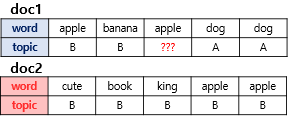

위의 그림은 두 개의 문서 doc1과 doc2를 보여줍니다. 여기서는 doc1의 세번째 단어 apple의 토픽을 결정하고자 합니다.

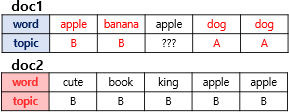

우선 첫번째로 사용하는 기준은 문서 doc1의 단어들이 어떤 토픽에 해당하는지를 봅니다.  
doc1의 모든 단어들은 토픽 A와 토픽 B에 50 대 50의 비율로 할당되어져 있으므로, 이 기준에 따르면 단어 apple은 토픽 A 또는 토픽 B 둘 중 어디에도 속할 가능성이 있습니다.

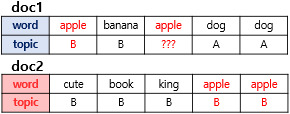

두번째 기준은 단어 apple이 전체 문서에서 어떤 토픽에 할당되어져 있는지를 봅니다.  
이 기준에 따르면 단어 apple은 토픽 B에 할당될 가능성이 높습니다.  
이러한 두 가지 기준을 참고하여 LDA는 doc1의 apple을 어떤 토픽에 할당할지 결정합니다.

#### 뉴스기사 전처리

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('샘플의 수 :',len(documents))

샘플의 수 : 11314


In [ ]:
documents[1]


"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) \n--\nBake Timmons, III"

In [ ]:
print(dataset.target_names)


['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
news_df = pd.DataFrame({'document':documents})

# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")

# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that will happily ever after anyway maybe start newsgroup atheist hard bummin much forget your flintstone chewables bake timmons'

In [ ]:
# NLTK로부터 불용어를 받아온다.
stop_words = stopwords.words('english')

# 토큰화
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) 

# 불용어를 제거합니다.
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
print(tokenized_doc[1])


['yeah', 'expect', 'people', 'read', 'actually', 'accept', 'hard', 'atheism', 'need', 'little', 'leap', 'faith', 'jimmy', 'logic', 'runs', 'steam', 'sorry', 'pity', 'sorry', 'feelings', 'denial', 'faith', 'need', 'well', 'pretend', 'happily', 'ever', 'anyway', 'maybe', 'start', 'newsgroup', 'atheist', 'hard', 'bummin', 'much', 'forget', 'flintstone', 'chewables', 'bake', 'timmons']


In [ ]:
from gensim import corpora

# corpora.Dictionary()를 통해 뉴스에서의 단어 인베딩과 빈도수를 기록
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]

# 결과 출력
# 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0
print(corpus[1]) 

[(52, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1)]


#### LDA모델 훈련

In [ ]:
import gensim

# 20개의 토픽, k=20
NUM_TOPICS = 20

# corpus를 가지고 lda모델 학습 num_topics은 토픽의 개수 , passes는 알고리즘의 동작 횟수
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)

# 학습한 lda모델의 토픽별 핵심 단어 확인, num_words 는 단어의 개수
topics = ldamodel.print_topics(num_words=4)

# 결과 출력
for topic in topics:
    print(topic)

(0, '0.027*"armenian" + 0.021*"armenians" + 0.016*"turkish" + 0.012*"turkey"')
(1, '0.020*"file" + 0.012*"program" + 0.009*"window" + 0.009*"output"')
(2, '0.022*"space" + 0.009*"nasa" + 0.006*"data" + 0.006*"program"')
(3, '0.023*"drive" + 0.018*"card" + 0.016*"disk" + 0.015*"windows"')
(4, '0.012*"keyboard" + 0.008*"pain" + 0.006*"picture" + 0.004*"current"')
(5, '0.009*"power" + 0.008*"used" + 0.008*"ground" + 0.007*"engine"')
(6, '0.009*"monitor" + 0.009*"period" + 0.007*"power" + 0.007*"jpeg"')
(7, '0.008*"cross" + 0.007*"weaver" + 0.006*"linked" + 0.005*"romans"')
(8, '0.010*"nrhj" + 0.007*"wwiz" + 0.006*"bxom" + 0.006*"gizw"')
(9, '0.007*"insurance" + 0.005*"rockefeller" + 0.005*"bill" + 0.004*"section"')
(10, '0.020*"would" + 0.014*"like" + 0.012*"know" + 0.010*"think"')
(11, '0.021*"game" + 0.019*"team" + 0.014*"year" + 0.014*"games"')
(12, '0.012*"health" + 0.011*"medical" + 0.010*"jews" + 0.008*"disease"')
(13, '0.012*"filename" + 0.009*"food" + 0.008*"cover" + 0.006*"copies

만약 10개의 단어를 출력하고 싶다면 아래의 코드를 수행하면 됩니다.

In [ ]:
print(ldamodel.print_topics())

[(0, '0.027*"armenian" + 0.021*"armenians" + 0.016*"turkish" + 0.012*"turkey" + 0.010*"russian" + 0.009*"armenia" + 0.008*"genocide" + 0.008*"turks" + 0.007*"people" + 0.007*"azerbaijan"'), (1, '0.020*"file" + 0.012*"program" + 0.009*"window" + 0.009*"output" + 0.009*"files" + 0.008*"entry" + 0.007*"windows" + 0.007*"image" + 0.006*"available" + 0.006*"display"'), (2, '0.022*"space" + 0.009*"nasa" + 0.006*"data" + 0.006*"program" + 0.005*"research" + 0.005*"launch" + 0.005*"university" + 0.005*"center" + 0.005*"earth" + 0.005*"also"'), (3, '0.023*"drive" + 0.018*"card" + 0.016*"disk" + 0.015*"windows" + 0.014*"system" + 0.014*"scsi" + 0.011*"memory" + 0.009*"hard" + 0.009*"video" + 0.008*"problem"'), (4, '0.012*"keyboard" + 0.008*"pain" + 0.006*"picture" + 0.004*"current" + 0.004*"compass" + 0.004*"pictures" + 0.003*"sleeve" + 0.003*"identified" + 0.003*"typing" + 0.003*"also"'), (5, '0.009*"power" + 0.008*"used" + 0.008*"ground" + 0.007*"engine" + 0.006*"wire" + 0.006*"cars" + 0.005*"

#### LDA 시각화

LDA 시각화를 위해서는 pyLDAvis의 설치가 필요합니다.

In [ ]:
# pyLDAvis.gensim_models 호출
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


좌측의 원들은 각각의 20개의 토픽을 나타냅니다.  
각 원과의 거리는 각 토픽들이 서로 얼마나 다른지를 보여줍니다.  
만약 두 개의 원이 겹친다면, 이 두 개의 토픽은 유사한 토픽이라는 의미입니다. 

위의 그림에서는 10번 토픽을 클릭하였고, 이에 따라 우측에는 10번 토픽에 대한 정보가 나타납니다.  
한 가지 주의할 점은 LDA 모델의 출력 결과에서는 토픽 번호가 0부터 할당되어 0부터19부터의 숫자가 사용된 것과는 달리  
LDA 시각화에서는 토픽의 번호가 1부터 시작하므로 각 토픽 번호는 이제 +1이 된 값인 1부터20까지의 값을 가집니다.

## 인공지능을 활용하여 문서 요약하기

In [4]:
from gensim.summarization.summarizer import summarize

ModuleNotFoundError: No module named 'gensim.summarization'

gensim 4.x에서 summarization이 사라짐

In [ ]:
data = 'By the start of the 16th century, the Renaissance movement had given birth to the Protestant Reformation and an era of profound religious change. The art of this period reflected the disruption caused by this shift. Appropriately named the Baroque, meaning irregular or distorted, European painting in the 16th century largely focused on capturing motion, drama, action, and powerful emotion. Painters employed the strong visual tools of dramatic composition, intense contrast of light and dark, and emotionally provocative subject matter to stir up feelings of disruption. Religious subjects were often portrayed in this era through new dramatic visual language, a contrast to the reverential portrayal of religious figures in earlier traditions. In order to capture the social disruption surrounding Christianity and the Roman Catholic Church, many artists abandoned old standards of visual perfection from the Classical and Renaissance periods in their portrayal of religious figures.'

In [ ]:
print(summarize(data, word_count = 15))

정부는 지난 15일 사회적 거리두기 해제를 발표하면서 실외 마스크 해제에 대해서는 2주간 상황을 지켜보고 결정하겠다고 밝혔다.


In [ ]:
data2 = '''방대본 "실외마스크 해제하면 2ｍ 내 마스크 벗어도 처벌 안해"
송고시간2022-04-21 12:57 日本語中文요약beta 공유 댓글4 글자크기조정 인쇄
최인영 기자
최인영 기자
기자 페이지
"실외선 해제해도 실내마스크는 상당기간 착용 권고"
"확진자 격리해제는 4주 뒤 전문가·인수위 종합 고려해 결정"
방대본 "실외마스크 해제하면 2ｍ 내 마스크 벗어도 처벌 안해"
방대본 "실외마스크 해제하면 2ｍ 내 마스크 벗어도 처벌 안해"
[연합뉴스 자료사진]

(서울=연합뉴스) 최인영 박규리 기자 = 방역당국은 실외 마스크 착용 의무가 해제되면 2ｍ 간격 안에 다른 사람이 있을 때 마스크를 벗어도 과태료를 부과하지 않게 된다고 설명했다.

김유미 중앙방역대책본부 일상방역관리팀장은 21일 방대본 백브리핑에서 "실외 마스크를 해제한다면 실외 (사람 간) 간격 기준이 없어진다는 의미"라며 이같이 말했다.

그는 지금도 실외에서는 2ｍ 이상 간격이 있으면 마스크를 착용하지 않아도 과태료 대상이 아니라고 밝혔다.

advertisement
이어 "간격이 좁아지면 기침이나 재채기 등으로 침방울을 통한 감염 가능성이 커지겠지만, 실외이기 때문에 실내와 비교해서는 가능성이 덜하다"고 덧붙였다.


이스라엘이 오는 23일부터 실내 마스크 의무도 해제하기로 발표한 가운데 방대본은 "실외 마스크 착용 의무를 해제하더라도 실내 마스크는 상당 기간 착용 의무를 유지할 방침"이라고 강조했다.

김 팀장은 계절적으로 여름이 다가오는 가운데 문 닫고 에어컨을 이용하는 습관, 3밀 환경과 지하철·버스를 많이 이용하는 생활을 고려할 때 실내마스크 해제 "시기상조"라며 "굉장히 신중한 검토가 필요한 상황"이라고 말했다.

그는 "향후 실외 마스크를 해제하더라도 실내에서는 고위험군을 보호하고 유증상자 등 감염될 수 있는 분을 차단할 수 있도록 상당 기간 착용 권고할 예정"이라고 밝혔다.

'마스크, 요일 수량 제한 없이 판매중'
'마스크, 요일 수량 제한 없이 판매중'
[연합뉴스 자료사진]

정부는 지난 15일 사회적 거리두기 해제를 발표하면서 실외 마스크 해제에 대해서는 2주간 상황을 지켜보고 결정하겠다고 밝혔다. 김 팀장은 "다음 주 말께 (실외 마스크 해제를) 검토한다"고 말했다.

정부는 오는 25일 고시를 개정해 코로나19의 감염병 등급을 1급에서 2급으로 낮추고, 방역·의료체계 일상화를 본격적으로 추진한다. 2급 감염병이 되면 확진자 7일 격리의무와 그에 따른 정부의 생활비 지원 등이 사라진다.

다만 오는 25일부터 4주간을 '이행기'로 둬서 확진자 7일 격리 의무 등 현행 관리체계를 유지하고 의료 현장이 준비할 수 있도록 할 방침이다.

[그래픽] 포스트 오미크론 사회적 거리두기 변화
[그래픽] 포스트 오미크론 사회적 거리두기 변화
(서울=연합뉴스) 박영석 기자 zeroground@yna.co.kr
트위터 @yonhap_graphics 페이스북 tuney.kr/LeYN1

이에 대해 대통령직인수위원회는 전날 "정부가 5월 말에 격리 의무를 완전히 해제한다고 결정한 것은 상당히 성급한 접근"이라며 우려의 목소리를 냈다.

김 팀장은 "국민들에게 갑작스러운 변화는 쉽지 않으니 잠정 4주간의 이행기 동안 단계적으로 여러 대응 수단을 정비하고 유행 상황과 위험도를 평가한 뒤에 격리 의무를 전환할지 여부를 판단하겠다는 것"이라고 부연했다.

그러면서 "현재 상황에서 판단하기보다는 잠정적으로 4주 동안 전문가 의견과 인수위에서 나오는 상황을 종합적으로 고려해서 한 달 뒤에 판단할 계획"이라고 밝혔다.

종합적 판단 결과에 따라 격리의무를 해제하지 않을 가능성도 있느냐는 물음에 김 팀장은 "단정적으로 답변하기는 어렵다"고 답했다.

그는 또 "격리의무 해제와 위험도는 별개의 사안"이라며 주위에 전파 위험은 크지만 격리 의무가 없는 인플루엔자를 예로 들었다. 인플루엔자에 걸리면 의무가 없어도 개인·직장·학교 차원에서 전파 차단 노력을 한다는 것이다.

거리두기 해제... 한산한 선별진료소
거리두기 해제... 한산한 선별진료소
[연합뉴스 자료사진]

이어 "격리의무를 해제하는 것은 백신이나 먹는치료제를 구해서 일반 의료체계가 준비됐다고 판단했고, 전수 격리했을 때의 사회적 부담도 일부 고려한 결과"라며 "의무가 해제돼도 처벌받지 않는 것이지 위험이 떨어졌다는 것은 아니므로 고위험군이 있는 병원 등에서는 적정한 감염 관리를 해야 한다"고 강조했다.

정부가 코로나19 유행 상황이 계속 낮아지면 유전자증폭(PCR) 검사 중심 진단체계로 돌아갈 수 있다고 전날 밝힌 것과 관련, 방대본은 "검사체계가 고위험군이나 감염 취약층으로 조정돼서 검사 대상 일부가 조정될 수 있으며, 정해진 검사 대상에만 국비를 지원할 예정"이라고 설명했다.

또 보건소 PCR 검사 체계를 계속 유지할 방침이고, 동네 병·의원에서 시행하는 신속항원검사 비용 부담에 대해서는 보건복지부에서 검토하고 있다고 밝혔다. 정부는 다음 달 13일까지 병·의원 신속항원검사 양성을 코로나19 확진으로 인정할 예정이다.

해외 입국자를 대상으로 하는 PCR 검사에 대해서는 "입국 1일 차 검사는 유지한다"며 "해외에서 발생하는 신규변이 유입을 확인하고 새로운 감염원 노출에 의한 재감염을 확인하기 위한 감시 목적"이라고 설명했다.

고재영 질병관리청 대변인은 "전반적으로 확진자는 전주 대비 30% 이상 감소했지만 위중증과 사망자는 완만하게 감소하고 있다"며 고위험군인 고령층, 특히 70·80대 연령층의 감염을 차단하기 위해 공동체의 노력이 필요한 시점이라고 당부했다.'''

In [ ]:
print(summarize(data2, word_count=15))